# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [24]:
import numpy
import matplotlib.pyplot as plt
import skimage.io

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

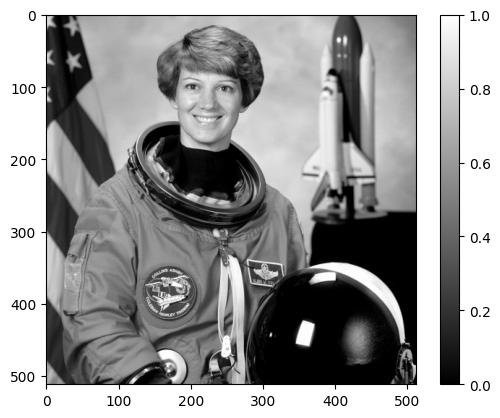

In [25]:
astr = plt.imread("data/astronaut.png")
plt.figure()
plt.imshow(astr, "gray")
plt.colorbar()

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [45]:
def prewitt_h(img_in):
    size = 3
    n = (size - 1) // 2 # Mittelpunkt des Filters
    result = numpy.zeros(img_in.shape)

    for p in numpy.ndindex(img_in.shape): # über alle Pixel laufen
        neighborhood_sum = 0

        for q in numpy.ndindex(size, size): # über die Filtermaske laufen
            y = q[0]+p[0]-n
            x = q[1]+p[1]-n

            if y < img_in.shape[0] and y>=0 and x>=0 and x< img_in.shape[1]:
                if q[1] == 0:
                    w = -1
                elif q[1] == 1:
                    w = 0
                else:
                    w = 1
                neighborhood_sum += w*img_in[y,x]
            else:
                neighborhood_sum = 0 
                break

        result[p] = neighborhood_sum/6
    return result
    


In [55]:
def prewitt_v(img_in):
    size = 3
    n = (size - 1) // 2 # Mittelpunkt des Filters
    result = numpy.zeros(img_in.shape)

    for p in numpy.ndindex(img_in.shape): # über alle Pixel laufen
        neighborhood_sum = 0

        for q in numpy.ndindex(size, size): # über die Filtermaske laufen
            y = q[0]+p[0]-n
            x = q[1]+p[1]-n

            if y < img_in.shape[0] and y>=0 and x>=0 and x< img_in.shape[1]:
                if q[0] == 0:
                    w = 1
                elif q[0] == 1:
                    w = 0
                else:
                    w = -1
                neighborhood_sum += w*img_in[y,x]
            else:
                neighborhood_sum = 0 
                break

        result[p] = neighborhood_sum/6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

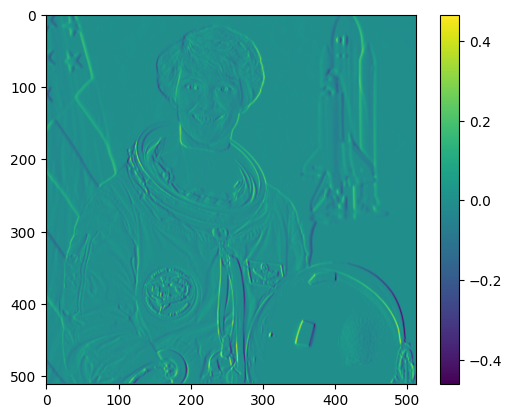

In [47]:
astr_h = prewitt_h(astr)
plt.imshow(astr_h)
plt.colorbar()

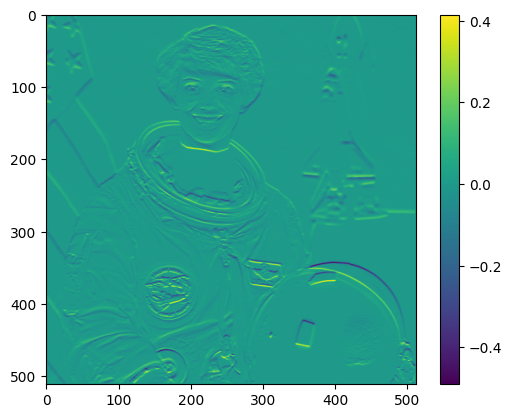

In [70]:
astr_v = prewitt_v(astr)
plt.imshow(astr_v)
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

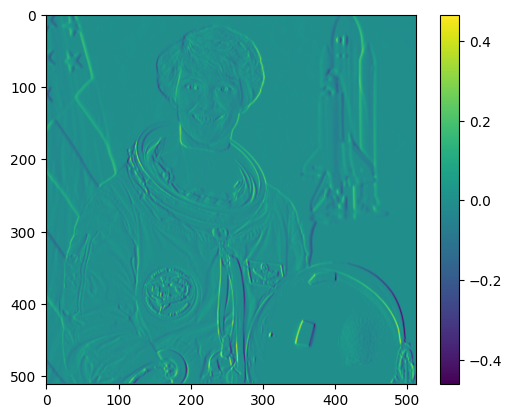

In [50]:
astr_prewitt_h = skimage.io.imread("data/astronaut_prewitt_h.tiff")
plt.imshow(astr_prewitt_h)
plt.colorbar()

assert numpy.allclose(astr_h, astr_prewitt_h)

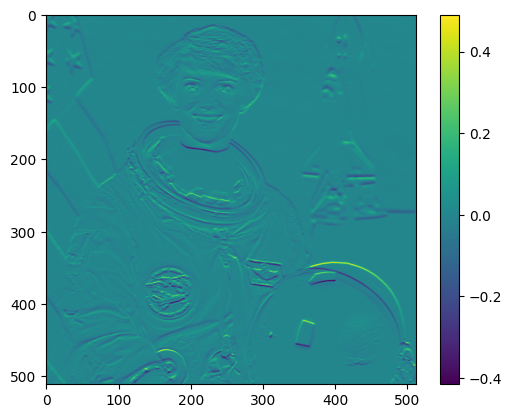

In [71]:
astr_prewitt_v = skimage.io.imread("data/astronaut_prewitt_v.tiff")
plt.imshow(astr_prewitt_v)
plt.colorbar()

assert numpy.allclose(astr_v, astr_prewitt_v, atol=254/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

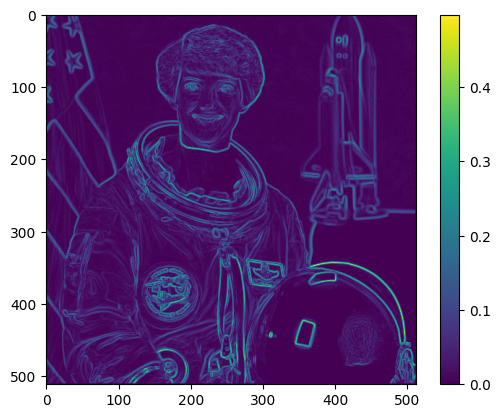

In [66]:
gx = prewitt_h(astr)
gy = prewitt_v(astr)

grad_mag = np.sqrt(gy**2 + gx**2)

plt.imshow(grad_mag)
plt.colorbar()

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

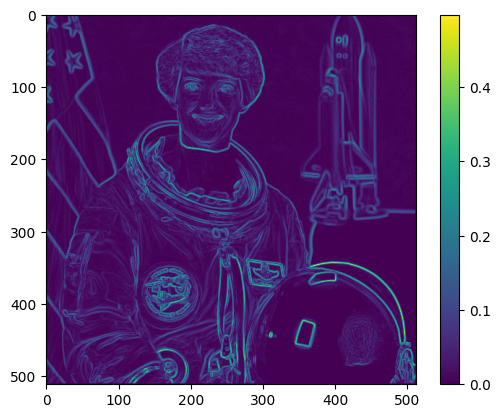

In [68]:
astr_prewitt_gradmag = skimage.io.imread("data/astronaut_prewitt_gradmag.tiff")
plt.imshow(astr_prewitt_gradmag)
plt.colorbar()

assert numpy.allclose(grad_mag, astr_prewitt_gradmag)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`: